In [ ]:
!nvcc --version
!nvidia-smi

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2021 NVIDIA Corporation
Built on Sun_Feb_14_21:12:58_PST_2021
Cuda compilation tools, release 11.2, V11.2.152
Build cuda_11.2.r11.2/compiler.29618528_0
Mon Jan  2 07:55:59 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   65C    P0    29W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |      

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/MyDrive/DD2360'
!ls

Mounted at /content/drive
/content/drive/MyDrive/DD2360
histogram.txt  lab3   lab3_ex1	   lab3_ex2	lab3_ex3.cu
lab	       lab33  lab3_ex1.cu  lab3_ex2.cu	test.txt


In [ ]:
!nvcc -arch=sm_75 ./lab3_ex2.cu -o lab3_ex2
!./lab3_ex2 511 1023 1023 4094

Input matrix dim (511 x 1023) (1023 x 4094) (511 x 4094)


In [ ]:
!/usr/local/cuda-11/bin/nv-nsight-cu-cli ./lab3_ex2 511 1023 1023 4094

Input matrix dim (511 x 1023) (1023 x 4094) (511 x 4094)
==PROF== Connected to process 963 (/content/drive/MyDrive/DD2360/lab3_ex2)
==PROF== Profiling "gemm" - 1: 0%....50%....100% - 8 passes
==PROF== Disconnected from process 963
[963] lab3_ex2@127.0.0.1
  gemm(double*, double*, double*, int, int, int, int), 2023-Jan-02 07:58:09, Context 1, Stream 7
    Section: GPU Speed Of Light
    ---------------------------------------------------------------------- --------------- ------------------------------
    DRAM Frequency                                                           cycle/nsecond                           5.00
    SM Frequency                                                             cycle/usecond                         600.05
    Elapsed Cycles                                                                   cycle                     47,091,116
    Memory [%]                                                                           %                          28.43
    S

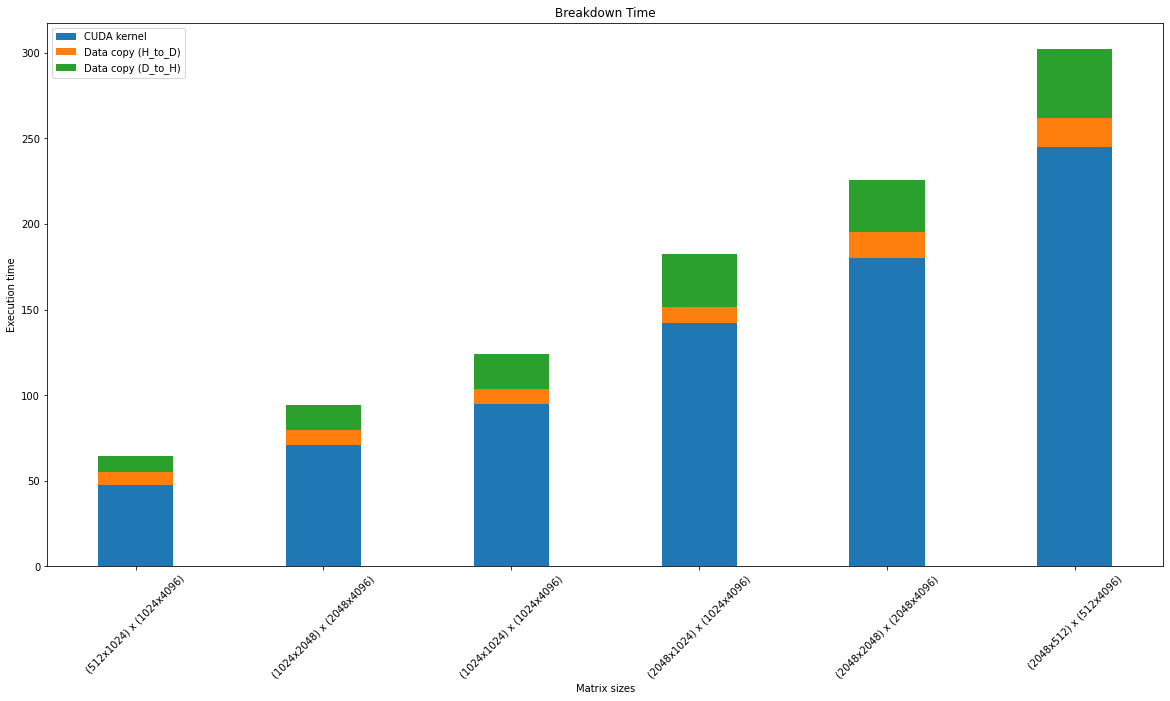

In [1]:
import matplotlib.pyplot as plt
import numpy as np

matrix_sizes = ['(512x1024) x (1024x4096)', '(1024x2048) x (2048x4096)', '(1024x1024) x (1024x4096)',
                '(2048x1024) x (1024x4096)', '(2048x2048) x (2048x4096)', '(2048x512) x (512x4096)']
cuda_kernel = np.array([47.401, 71.125, 94.712, 142.07, 179.91, 244.97])
datacpy_d2h = np.array([9.4017, 14.889, 20.438, 30.584, 30.605, 40.466])
datacpy_h2d = np.array([7.5947, 8.4505, 8.6178, 9.6579, 15.154, 16.806])



width = 0.4
fig, ax = plt.subplots(1)

ax.bar(matrix_sizes, cuda_kernel, width, label='CUDA kernel')
ax.bar(matrix_sizes, datacpy_h2d, width, bottom=cuda_kernel,
       label='Data copy (H_to_D)')
ax.bar(matrix_sizes, datacpy_d2h, width, bottom=datacpy_h2d+cuda_kernel,
       label='Data copy (D_to_H)')

ax.set_xlabel('Matrix sizes')
ax.set_ylabel('Execution time')
ax.set_title('Breakdown Time')
ax.legend()



for tick in ax.get_xticklabels():
    tick.set_rotation(45)

fig.set_size_inches(20, 10, forward=True)
plt.show()

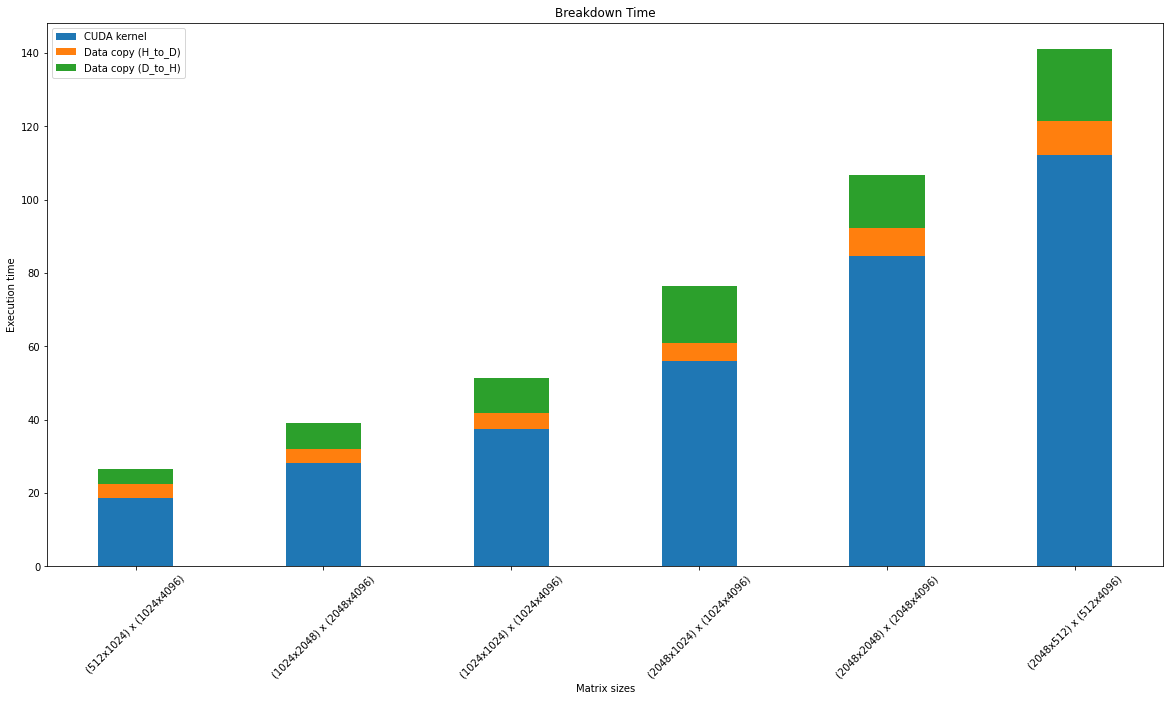

In [2]:
import matplotlib.pyplot as plt
import numpy as np

matrix_sizes = ['(512x1024) x (1024x4096)', '(1024x2048) x (2048x4096)', '(1024x1024) x (1024x4096)',
                '(2048x1024) x (1024x4096)', '(2048x2048) x (2048x4096)', '(2048x512) x (512x4096)']
cuda_kernel = np.array([18.735, 28.069, 37.398, 56.066, 84.762, 112.18])
datacpy_d2h = np.array([4.1418, 6.9525, 9.7461, 15.564, 14.428, 19.800])
datacpy_h2d = np.array([3.6500, 3.9571, 4.3047, 4.7697, 7.4046, 9.1401])


width = 0.4
fig, ax = plt.subplots(1)

ax.bar(matrix_sizes, cuda_kernel, width, label='CUDA kernel')
ax.bar(matrix_sizes, datacpy_h2d, width, bottom=cuda_kernel,
       label='Data copy (H_to_D)')
ax.bar(matrix_sizes, datacpy_d2h, width, bottom=datacpy_h2d+cuda_kernel,
       label='Data copy (D_to_H)')

ax.set_xlabel('Matrix sizes')
ax.set_ylabel('Execution time')
ax.set_title('Breakdown Time')
ax.legend()

for tick in ax.get_xticklabels():
    tick.set_rotation(45)
fig.set_size_inches(20, 10, forward=True)
plt.show()